In [ ]:
!pip install chat-downloader

In [ ]:
!pip install pyenchant

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.7/55.7 KB 2.6 MB/s eta 0:00:00


In [ ]:
!pip install tqdm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Twitch Scrapping



In [ ]:
import enchant
d = enchant.Dict("en_US")
d.check("Hello")

True

In [ ]:
from chat_downloader import ChatDownloader
import tqdm
url = 'https://www.twitch.tv/videos/1756561734'
chat = ChatDownloader().get_chat(url)       # create a generator
data = []

i = 0
for message in chat:
  try:    
    if message['author']['badges'][0]['name'] != "moderator":
      js = {
            'timestamp': message['timestamp'],
            'time_text': message['time_text'],
            'message_type':message['message_type'],
            'message':message['message'],
            'author_id':message['author']['id'],
            'author_name':message['author']['name'],
            'author_badge':message['author']['badges'][0]['name'],
            }
      data.append(js)
    #chat.print_formatted(message)
  except:
    try:
      js = {
              'timestamp': message['timestamp'],
              'time_text': message['time_text'],
              'message_type':message['message_type'],
              'message':message['message'],
              'author_id':message['author']['id'],
              'author_name':message['author']['name'],
              'author_badge':None,
          }
      data.append(js)
    except:
      i = i - 1
      pass
  i = i + 1
  if i % 1000 == 0:
    print(i)


In [ ]:
import json
json_object = json.dumps(data, indent=4)
 
# Writing to sample.json
with open("minecraft.json", "w") as outfile:
    outfile.write(json_object)

# Word Cloud and Plots

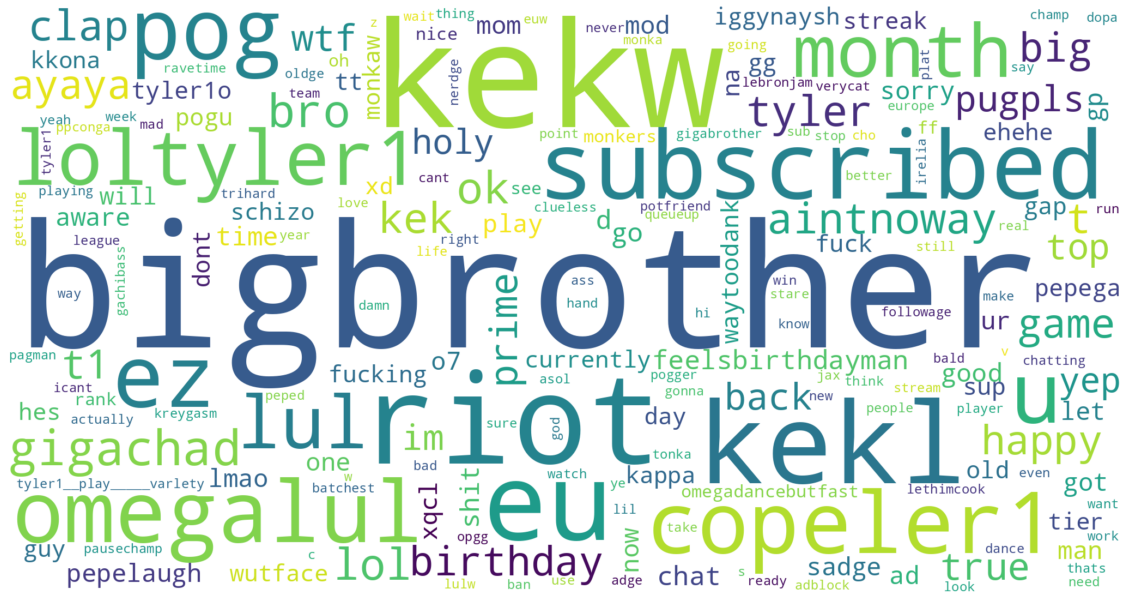

In [ ]:
import pandas as pd
import json
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud
import numpy as np
import seaborn as sns
from tqdm import tqdm
from collections import Counter
f = open('lol.json')
data = json.load(f)
# message["message"] is each chat meassage in the dataset -- (format is string), text1 is the concatination of all chats 
text1 = " ".join(message["message"] for message in data)
word_cloud1 = WordCloud(collocations = False, background_color = 'white',
                        width = 2048, height = 1080).generate(text1.lower())
# saving the image
plt.figure(figsize=(20, 40))
plt.imshow(word_cloud1, interpolation='bilinear')
plt.axis("off")
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


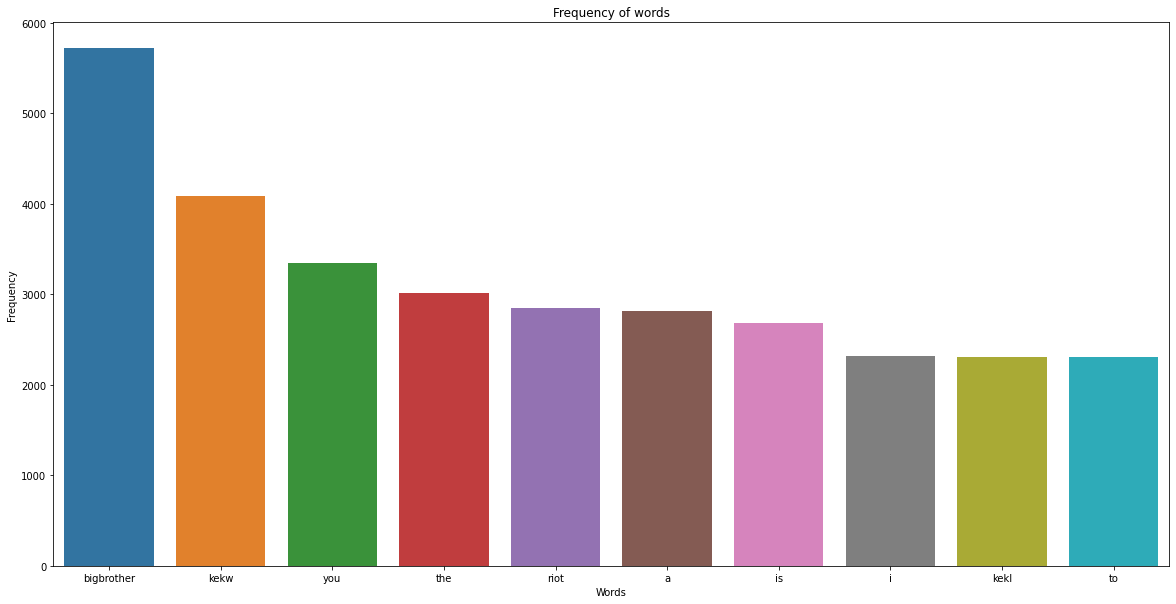

In [ ]:
# text1 is the concatination of all chats 
word_counts = Counter(text1.lower().split())
word_list = []
word_count = []
for word in word_counts.most_common(10):
  word_list.append(word[0])
  word_count.append(word[1])

# Plot for Frequency of words without removal of emojis/non-english words
plt.figure(figsize=(20, 10))
sns.barplot(word_list,word_count)
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Frequency of words")
plt.show()

100%|██████████| 70725/70725 [00:12<00:00, 5576.13it/s]


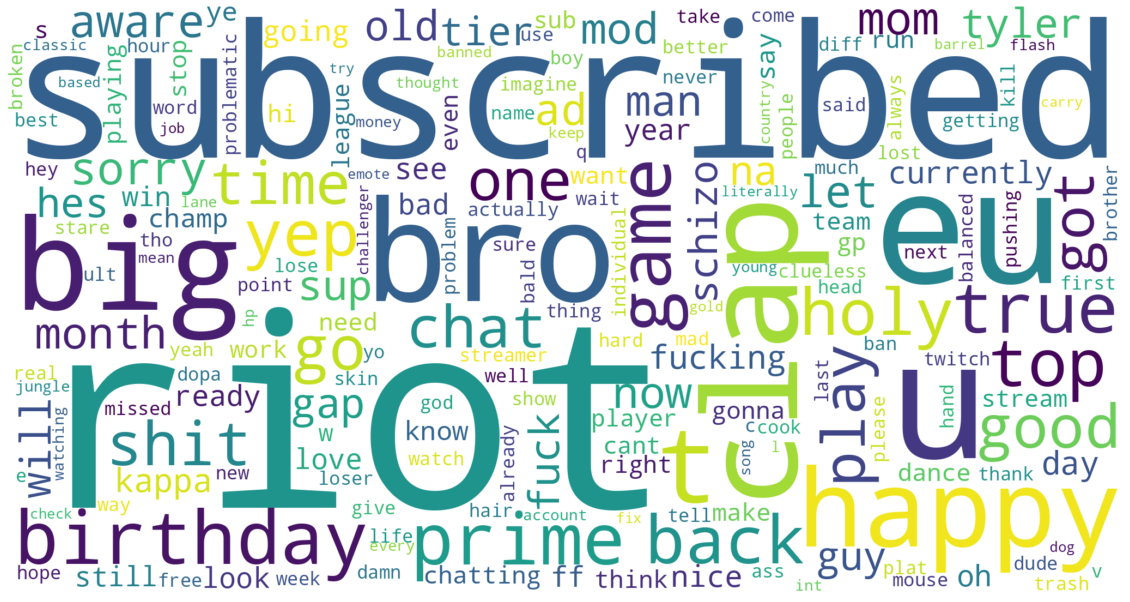

In [ ]:
text1 = " "

# data is json file containing chats, message["message"] is each comment, d.check(m) checks if the word is present in english dictionary
for message in tqdm(data):
  for m in message["message"].split():
    if d.check(m) == True:
      text1 = text1 + m + " "

# word cloud for twitch chats after removing non english words
word_cloud1 = WordCloud(collocations = False, background_color = 'white',
                        width = 2048, height = 1080).generate(text1.lower())
plt.figure(figsize=(20, 40))
plt.imshow(word_cloud1, interpolation='bilinear')
plt.axis("off")
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


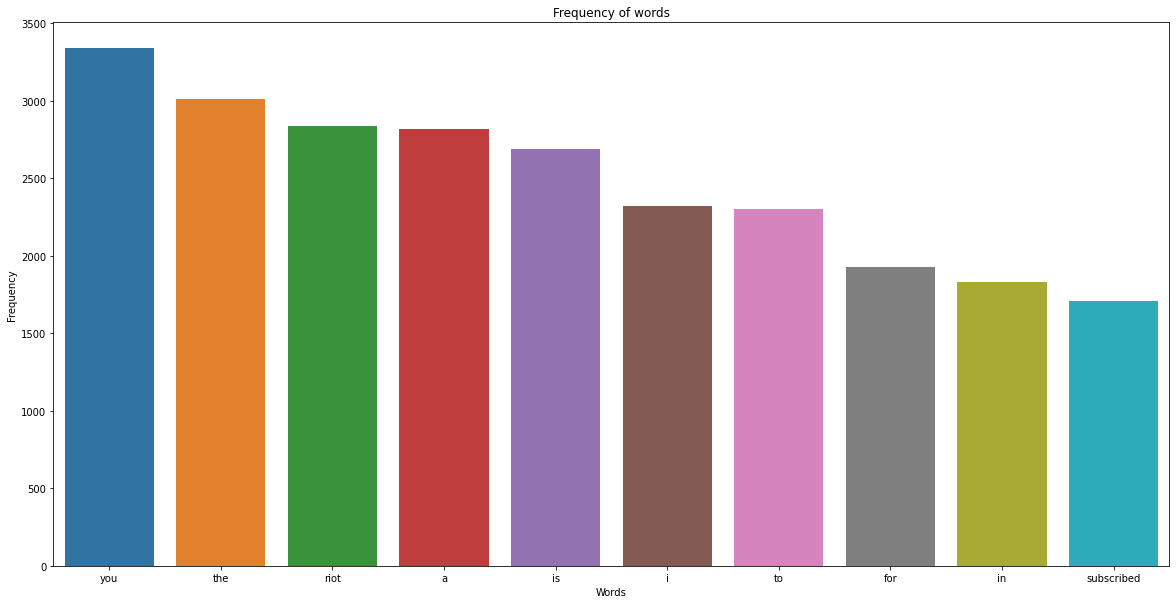

In [ ]:
word_counts = Counter(text1.lower().split())
word_list = []
word_count = []
for word in word_counts.most_common(10):
  word_list.append(word[0])
  word_count.append(word[1])

# Plot for Frequency of words after removal of emojis/non-english words
plt.figure(figsize=(20, 10))
sns.barplot(word_list,word_count)
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Frequency of words")
plt.show()

In [ ]:
# Code to store the length of chats 
text_lengths = np.array([len(message["message"].split()) for message in data])

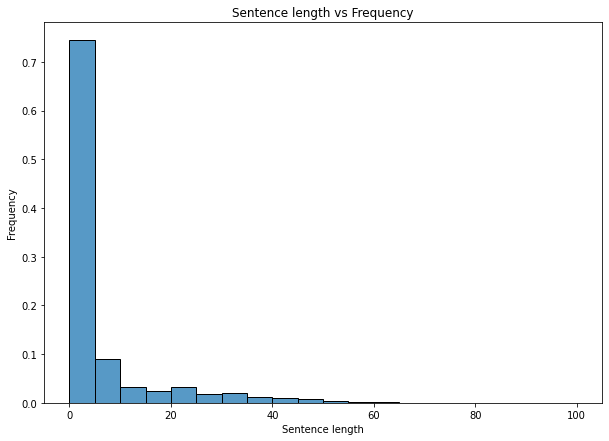

In [ ]:
# plotting the frequency of sentence length
plt.figure(figsize=(10, 7))

sns.histplot(text_lengths,binwidth=5,stat = "probability")
plt.xlabel("Sentence length")
plt.ylabel("Frequency")
plt.title("Sentence length vs Frequency")
plt.show() 

In [ ]:
text_lengths = [len(set(message["message"].split())) for message in data]

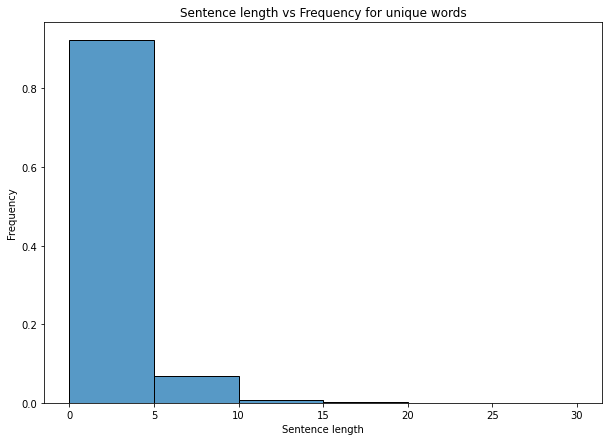

In [ ]:
# plotting the frequency of sentence length by considering only unique words
plt.figure(figsize=(10, 7))
sns.histplot(text_lengths,binwidth=5,stat = "probability")
plt.xlabel("Sentence length")
plt.ylabel("Frequency")
plt.title("Sentence length vs Frequency for unique words")
plt.show() 